<a href="https://colab.research.google.com/github/hxri/Deep-Learning-Lab/blob/main/Experiment_4_KMeans_PCA_LDA_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd

In [20]:
df = pd.read_csv('/content/Iris.csv')

In [31]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
X = df[['SepalLengthCm','PetalLengthCm','PetalLengthCm','PetalWidthCm']].values

In [36]:
pca = PCA(n_components=2)
data = pca.fit_transform(X)

In [45]:
data

array([[-3.55269786e+00, -2.33419057e-01],
       [-3.60721064e+00, -4.26490300e-02],
       [-3.79220764e+00,  1.16725555e-01],
       [-3.55849559e+00,  2.74901452e-01],
       [-3.57995425e+00, -1.38034043e-01],
       [-3.02492245e+00, -3.84947083e-01],
       [-3.66170301e+00,  2.63726355e-01],
       [-3.44947004e+00, -1.06638602e-01],
       [-3.74349259e+00,  4.34276037e-01],
       [-3.50400322e+00, -3.14739331e-02],
       [-3.34044448e+00, -4.88178656e-01],
       [-3.37349860e+00,  1.15526867e-01],
       [-3.66174383e+00,  3.25156387e-02],
       [-4.18947843e+00,  4.15254381e-01],
       [-3.62287158e+00, -9.63905034e-01],
       [-3.20412172e+00, -7.33893006e-01],
       [-3.54685932e+00, -5.10528849e-01],
       [-3.52542107e+00, -2.13198712e-01],
       [-2.97043008e+00, -6.91322468e-01],
       [-3.39493685e+00, -1.81803271e-01],
       [-3.07947604e+00, -4.25387773e-01],
       [-3.36766005e+00, -1.61582926e-01],
       [-4.21091668e+00,  1.17924244e-01],
       [-3.

In [39]:
print(pca.components_)

[[ 0.27256389  0.65242109  0.65242109  0.27276796]
 [-0.95385013  0.15697721  0.15697721  0.20220345]]


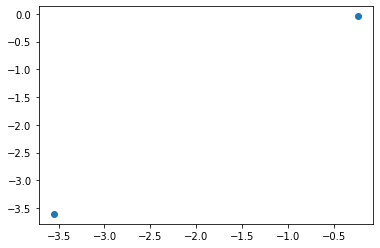

In [41]:
import matplotlib.pyplot as plt
plt.scatter(data[0], data[1])

In [48]:
data.shape

(150, 2)

In [52]:
new_df = pd.DataFrame(data, columns=['pc1','pc2'])

In [53]:
new_df

,pc1,pc2
0,-3.552698,-0.233419
1,-3.607211,-0.042649
2,-3.792208,0.116726
3,-3.558496,0.274901
4,-3.579954,-0.138034
...,...,...
145,2.414617,-0.141925
146,1.935516,0.095943
147,2.278274,-0.011816
148,2.539304,0.397791


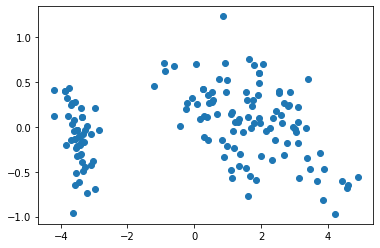

In [55]:
plt.scatter(new_df['pc1'], new_df['pc2'])

# K Means Clustering

In [56]:
from sklearn.cluster import KMeans

In [58]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(new_df.values)

In [83]:
lb = kmeans.labels_

In [91]:
lb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [76]:
centers = kmeans.cluster_centers_

In [77]:
centers

array([[-3.34249347, -0.0745584 ],
       [ 1.82631087,  0.04073809]])

In [62]:
out = kmeans.fit_transform(new_df.values)

In [65]:
final_df = pd.DataFrame(out)

In [67]:
final_df

,0,1
0,0.263482,5.385991
1,0.266633,5.434161
2,0.488705,5.619032
3,0.410827,5.389895
4,0.245798,5.409220
...,...,...
145,5.757505,0.616012
146,5.280763,0.122366
147,5.621118,0.455009
148,5.900733,0.797399


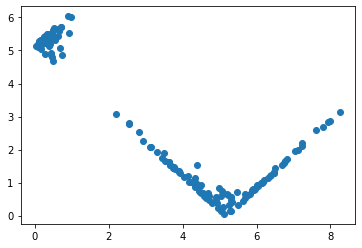

In [90]:
plt.scatter(final_df[0], final_df[1])

In [71]:
pds = kmeans.predict(new_df.values)

In [75]:
pds.shape

(150,)

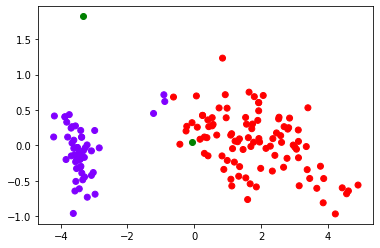

In [88]:
plt.scatter(centers[0], centers[1], color='green')
plt.scatter(new_df['pc1'], new_df['pc2'], c=lb, cmap='rainbow')

# Kaggle Data

In [92]:
!wget https://raw.githubusercontent.com/hxri/Deep-Learning-Lab/main/Datasets/bank.csv

--2022-05-11 10:01:31--  https://raw.githubusercontent.com/hxri/Deep-Learning-Lab/main/Datasets/bank.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 918960 (897K) [text/plain]
Saving to: ‘bank.csv’

bank.csv            100%[===================>] 897.42K  --.-KB/s    in 0.05s   

2022-05-11 10:01:31 (16.9 MB/s) - ‘bank.csv’ saved [918960/918960]



In [93]:
df = pd.read_csv('/content/bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [95]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)

In [96]:
X=df.drop(['deposit', 'age', 'balance', 'day', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous'],axis=1)
y=df['deposit']

In [97]:
X

,job,marital,education,default,housing,loan,contact,poutcome
0,0,1,1,0,1,0,2,3
1,0,1,1,0,0,0,2,3
2,9,1,1,0,1,0,2,3
3,7,1,1,0,1,0,2,3
4,0,1,2,0,0,0,2,3
...,...,...,...,...,...,...,...,...
11157,1,2,0,0,1,0,0,3
11158,7,1,1,0,0,0,2,3
11159,9,2,1,0,0,0,0,3
11160,9,1,1,0,0,1,0,0


In [109]:
pca = PCA(n_components=2)
data = pca.fit_transform(X)

In [110]:
data

array([[-4.54394901, -1.10346664],
       [-4.52192035, -1.07863842],
       [ 4.44381801, -1.26694743],
       ...,
       [ 4.53063229, -0.30354224],
       [ 4.51373679,  2.29528586],
       [ 4.51458318, -0.35830843]])

In [111]:
print(pca.components_)

[[ 9.98640780e-01  1.60491087e-02  3.63839803e-02 -2.84202762e-04
  -2.20286602e-02 -7.18387495e-03 -2.43682541e-02 -2.11249489e-03]
 [-1.81645331e-02  5.47661848e-02  1.09735541e-01 -5.75334193e-03
  -2.48282185e-02 -1.04817864e-02 -4.41905393e-01 -8.88025360e-01]]


In [113]:
data.shape

(11162, 2)

In [114]:
new_df = pd.DataFrame(data, columns=['pc1','pc2'])

In [115]:
new_df

,pc1,pc2
0,-4.543949,-1.103467
1,-4.521920,-1.078638
2,4.443818,-1.266947
3,2.446536,-1.230618
4,-4.485536,-0.968903
...,...,...
11157,-3.516907,-0.292790
11158,2.468565,-1.205790
11159,4.530632,-0.303542
11160,4.513737,2.295286


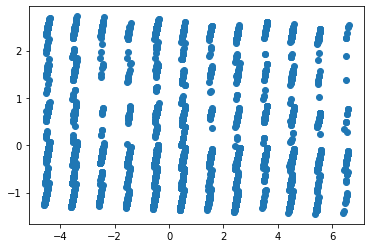

In [116]:
plt.scatter(new_df['pc1'], new_df['pc2'])

In [117]:
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(new_df.values)

In [118]:
lb = kmeans2.labels_

In [119]:
lb

array([0, 0, 1, ..., 1, 1, 1], dtype=int32)

In [120]:
centers = kmeans2.cluster_centers_

In [121]:
centers

array([[-2.05411692,  0.02465742],
       [ 3.76814134, -0.04523241]])

In [122]:
out = kmeans2.fit_transform(new_df.values)

In [123]:
final_df = pd.DataFrame(out)

In [124]:
final_df

,0,1
0,2.733483,8.379183
1,2.703205,8.354224
2,6.625059,1.396111
3,4.672430,1.775325
4,2.626588,8.305201
...,...,...
11157,1.496839,7.289253
11158,4.687073,1.742353
11159,6.592923,0.805057
11160,6.949277,2.456408


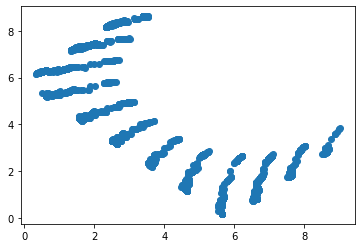

In [125]:
plt.scatter(final_df[0], final_df[1])

In [126]:
pds = kmeans.predict(new_df.values)

In [127]:
pds.shape

(11162,)

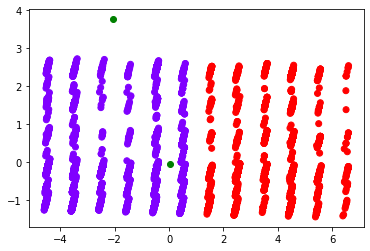

In [128]:
plt.scatter(centers[0], centers[1], color='green')
plt.scatter(new_df['pc1'], new_df['pc2'], c=lb, cmap='rainbow')